In [1]:
!gdown 1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt

Downloading...
From (original): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt
From (redirected): https://drive.google.com/uc?id=1L0p_hcZPEYuvqOUr2y3pvpKBqSPSuTCt&confirm=t&uuid=63dc89e1-f2ef-4488-b26b-84d95b5679cb
To: /content/CupIT_Sber_data.csv
100% 230M/230M [00:02<00:00, 102MB/s]


In [2]:


import pandas as pd
data = pd.read_csv('/content/CupIT_Sber_data.csv', sep=';')


In [3]:
data.head(10)

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00.0000000,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00.0000000,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0
5,0x9792A4526F5FAFFA2537A6526B6AC23C,0xE02E4412BB1F637FC4CDAFC793C4F7A4,2022-01-01 12:31:00.0000000,1720,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x129AB4F27EAA6C675A4E116AB616FE48,0x95758EBA87326C4D5DECC8B51A8B9C61,0
6,0x750447893A808F22D0E7BEBDADB58999,0xC97D0DF950D35FA4AF2655D749259B36,2022-01-01 12:46:00.0000000,1160,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x887078A50C93C3DFCCF23B6656BF767B,0x780F9A97F1A590D0CE88314FC065E5C8,0
7,0x07EA51E045B591DC5FBA5C1E6D7DEA4B,0x04848F8B05C6935CCECC26FB024BDC6E,2022-01-01 12:41:00.0000000,1720,0x405E158AE7F0523296EB12EECD73CD79,0x82078385014C595F44D63882A268F47A,0x95758EBA87326C4D5DECC8B51A8B9C61,0
8,0x32B405A9613D446FF83E2E73867A1B49,0xBBAF849258EA3A4CE4B58D2C7686775C,2022-01-01 12:55:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0x54054703A9278593F2C779D0E128A3A6,0x95758EBA87326C4D5DECC8B51A8B9C61,0
9,0x13781E636B106FF5B49921B1412BF3F5,0x8D8D44EEDA40B1AE7B659A5A738BF4F3,2022-01-01 12:59:00.0000000,312,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0


In [4]:
data.sort_values(by='service_date')

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
209,0x52EC5F105E1A112873CE07084FEE2244,0xAE125696322F73FD958DF6FE423A38F5,2022-01-01 12:20:00.0000000,425,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xBD46A7B2FCD9FC493D8E2EDBE225C9D1,0x01D029DF0704C6B5891DF7C601181E4D,0
208,0x70DD8F04A3C25809711899976DB2E8BA,0x85693A3739998C3F26FA037A6C7DC77E,2022-01-01 12:20:00.0000000,1921,0x4722B1782AB7DC9B16B2CC933C2A9E52,0xD913F10965FA2B60C031D03112BD3D02,0x7AE965F70DAE2CDB24F3B08C0B4C6CE8,0
206,0xD73A30C89136B625560F01F20F642148,0x476385497B98C5D85BBB966E8BCB3319,2022-01-01 12:20:00.0000000,"1640,5",0x4722B1782AB7DC9B16B2CC933C2A9E52,0x1CFFA4B1194317ABBF88267E29739718,0x9A574462105283982706076B43E656BD,0
...,...,...,...,...,...,...,...,...
1090977,0x8EEF0D22F0F1B091608B6231133C8DD4,0x500BDC514F2A9C63F9C1968A0B7CE2C0,2023-12-31 17:34:00.0000000,"13,71",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x2165571DB4EF41EECCD050DD1C4FABAA,0xFC98F1E83B20FA30BEC6DF7BB4D02D74,0
1090968,0xBF7CBE9DAB91FE33214440D65CB8CA06,0x9C7000465DE80BB0C1613E44CF368DCD,2023-12-31 17:34:00.0000000,"1518,07",0xCAD93EDD7E8593190FB7D3728D66D1BD,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
1090967,0x8AC66E4A3F207ACCEF340C6ACA3C11A6,0xFAA7695E600E871E9CD64EC250D5D4EC,2023-12-31 17:34:00.0000000,7138,0xCAD93EDD7E8593190FB7D3728D66D1BD,0xA5B4D2DDE961BEFC2BAC5E8960382A6E,0x834A7BF96A7A752F8D58493F50C9D8CB,0
1090970,0x836224ABD4E4279297958899C88B57E5,0x3A7408F89C37D813F95C5DE6B9CB10D3,2023-12-31 18:48:00.0000000,13500,0x654E6D737A7C1A4906758D4EF75C6076,0x3E6A29A25856B94A9BA989AC6D182545,0x266F51CD4CE99C60838643DC48070979,0


In [5]:
data.describe()

,is_hospital
count,1.091043e+06
mean,9.259488e-02
std,2.898640e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091043 entries, 0 to 1091042
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   service_document_id  1091043 non-null  object
 1   account_document_id  1091043 non-null  object
 2   service_date         1091043 non-null  object
 3   service_amount_net   1091043 non-null  object
 4   patient_id           1091043 non-null  object
 5   service_code         1091043 non-null  object
 6   service_name         1091043 non-null  object
 7   is_hospital          1091043 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 66.6+ MB


In [7]:
def add_date_time_columns(df, date_column):
    """
    Добавляет новые колонки в DataFrame на основе колонки с датой и временем.

    Параметры:
        df (pd.DataFrame): Исходный DataFrame.
        date_column (str): Название колонки с датой и временем.

    Возвращает:
        pd.DataFrame: DataFrame с новыми колонками.
    """
    # Преобразуем колонку в datetime, если она еще не в этом формате
    df[date_column] = pd.to_datetime(df[date_column])

    # Создаем новые колонки
    df['year'] = df[date_column].dt.year  # Год
    df['month'] = df[date_column].dt.month  # Месяц
    df['date'] = df[date_column].dt.date  # Дата (год, месяц, день)
    df['time'] = df[date_column].dt.time  # Время (часы, минуты, секунды)
    df['hour'] = df[date_column].dt.hour # часы
    df['day'] = df[date_column].dt.day # дни

    return df

In [8]:
data = add_date_time_columns(data, 'service_date')

In [9]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1


In [10]:
#день недели
from datetime import datetime
import numpy as np
days_ru = {
    0: "ПН",
    1: "ВТ",
    2: "СР",
    3: "ЧТ",
    4: "ПТ",
    5: "СБ",
    6: "ВС"
}
data['weekday_name'] = np.vectorize(lambda x: days_ru[x.weekday()])(data['date'])
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ


In [11]:
#выходные
#1-выходной, 0-нет

def wknd(x):
    if x == 'СБ' or x == 'ВС':
        return 1
    else:
        return 0
data['weekends'] = np.vectorize(wknd)(data['weekday_name'])
data.head()


,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1


In [12]:
#праздники
#1-праздник, 0-нет
def hld(x):
    m = [
        '2022-01-01',
        '2022-01-02',
        '2022-01-03',
        '2022-01-04',
        '2022-01-05',
        '2022-01-06',
        '2022-01-07',
        '2022-01-08',
        '2022-02-23',
        '2022-03-08',
        '2022-05-01',
        '2022-05-09',
        '2022-06-12',
        '2022-11-04',
        '2022-05-03',
        '2022-05-10',
        '2022-03-07',
        '2023-01-01',
        '2023-01-02',
        '2023-01-03',
        '2023-01-04',
        '2023-01-05',
        '2023-01-06',
        '2023-01-07',
        '2023-01-08',
        '2023-02-23',
        '2023-03-08',
        '2023-05-01',
        '2023-05-09',
        '2023-06-12',
        '2023-11-04',
        '2023-02-24',
        '2023-05-08'
    ]
    if x in m:
        return 1
    else:
        return 0
data['holidays'] = np.vectorize(hld)(data['date'].astype(str))

In [13]:
data['service_amount_net'] = data['service_amount_net'].str.replace(',', '.', regex=False)

In [14]:
data['service_amount_net'] = data['service_amount_net'].astype(float)

In [15]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time,hour,day,weekday_name,weekends,holidays
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:07:00,12,1,СБ,1,1
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,2022-01-01,12:17:00,12,1,СБ,1,1
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,2022-01-01,12:30:00,12,1,СБ,1,1
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,2022-01-01,12:33:00,12,1,СБ,1,1
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,2022-01-01,12:27:00,12,1,СБ,1,1


In [16]:
def add_service_code_statistics(df):
    """
    Добавляет колонки service_code_mean, service_code_median, service_code_std
    в DataFrame на основе уникальных значений service_code.

    Параметры:
        df (pd.DataFrame): Исходный DataFrame.

    Возвращает:
        pd.DataFrame: DataFrame с новыми колонками.
    """
    # Группируем данные по service_code и вычисляем статистику
    grouped = df.groupby('service_code')['service_amount_net'].agg(
        service_code_mean='mean',
        service_code_median='median',
        service_code_std='std'
    ).reset_index()

    # Объединяем исходный DataFrame с вычисленной статистикой
    df = df.merge(grouped, on='service_code', how='left')

    return df

In [17]:
data = add_service_code_statistics(data)

In [18]:
data['service_code_std'] = data['service_code_std'].fillna(0)

In [19]:
def add_service_name_statistics(df):
    """
    Добавляет колонки service_code_mean, service_code_median, service_code_std
    в DataFrame на основе уникальных значений service_code.

    Параметры:
        df (pd.DataFrame): Исходный DataFrame.

    Возвращает:
        pd.DataFrame: DataFrame с новыми колонками.
    """
    # Группируем данные по service_code и вычисляем статистику
    grouped = df.groupby('service_name')['service_amount_net'].agg(
        service_name_mean='mean',
        service_name_median='median',
        service_name_std='std'
    ).reset_index()

    # Объединяем исходный DataFrame с вычисленной статистикой
    df = df.merge(grouped, on='service_name', how='left')

    return df

In [20]:
data = add_service_name_statistics(data)
data['service_name_std'] = data['service_name_std'].fillna(0)
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,...,day,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.0,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2288.290331,2104.0,844.972010,2736.985463,2208.0,2045.034290
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.0,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022,1,...,1,СБ,1,1,5176.288072,4639.8,2189.748316,5176.288072,4639.8,2189.748316
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.0,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022,1,...,1,СБ,1,1,1682.299101,1395.2,925.269174,2388.233015,1453.5,2341.395651
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.0,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022,1,...,1,СБ,1,1,1725.591607,1700.0,544.285041,1725.591607,1700.0,544.285041
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.0,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,1,СБ,1,1,2353.000907,2104.0,1157.653136,2736.985463,2208.0,2045.034290


In [21]:
data['delta_time'] = data.groupby('service_document_id')['service_date'].transform(lambda x: x.max() - x.min())
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,...,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time
298369,0x15075263622836BE21F6ACB4FA8E4BF3,0xE3AD0B25AAB74181C30E1895104D2C04,2022-07-31 18:07:00,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,...,ВС,1,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394920,0x15075263622836BE21F6ACB4FA8E4BF3,0x025EEF6559D288810B72E30DA01C72BC,2022-10-06 15:57:31,-2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394921,0x15075263622836BE21F6ACB4FA8E4BF3,0xC957FFB34F7C95C41DA082B6ECB21592,2022-10-06 15:57:31,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394922,0x15075263622836BE21F6ACB4FA8E4BF3,0x5220BB151561EBCC97CE43EAFC084896,2022-10-06 15:57:57,-2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57
394923,0x15075263622836BE21F6ACB4FA8E4BF3,0x6B0CF840E51EF9A9B86E19CB514FB490,2022-10-06 15:57:57,2876.0,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,...,ЧТ,0,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57


In [22]:
# df = data.groupby('service_document_id')['service_amount_net'].agg('sum')
# df

In [23]:
result_data = data.groupby('service_document_id', as_index=False).agg({
    'service_amount_net': 'sum',
    'service_date': 'first'
})

In [24]:
result_data.loc[result_data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,service_amount_net,service_date
89380,0x15075263622836BE21F6ACB4FA8E4BF3,2876.0,2022-07-31 18:07:00


In [25]:
merged_df = pd.merge(result_data, data, on='service_document_id', suffixes=('_agg', '_original'))

data = merged_df.drop_duplicates(subset='service_document_id')
data.drop(columns=['service_date_original', 'service_amount_net_original'], inplace=True)

<ipython-input-25-fe787a764f23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['service_date_original', 'service_amount_net_original'], inplace=True)


In [26]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,service_amount_net_agg,service_date_agg,account_document_id,patient_id,service_code,service_name,is_hospital,year,month,...,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time
89984,0x15075263622836BE21F6ACB4FA8E4BF3,2876.0,2022-07-31 18:07:00,0xE3AD0B25AAB74181C30E1895104D2C04,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,...,ВС,1,0,1865.273077,2876.0,2149.056888,1834.896429,2785.2,2067.873023,66 days 21:50:57


In [27]:
data = data.rename(columns={'service_amount_net_agg': 'service_amount_net', 'service_date_agg': 'service_date'})
data

,service_document_id,service_amount_net,service_date,account_document_id,patient_id,service_code,service_name,is_hospital,year,month,...,weekday_name,weekends,holidays,service_code_mean,service_code_median,service_code_std,service_name_mean,service_name_median,service_name_std,delta_time
0,0x000016C54759E322AB2DF3CB8F8E40B2,2337.5,2022-01-23 11:44:00,0x47DBA428BB3ABED3574F0E692861F3D0,0xA9A8B0F7A3CB1ACA3ED719C206DAA412,0x54054703A9278593F2C779D0E128A3A6,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022,1,...,ВС,1,0,2276.728608,2104.00,832.870468,2736.985463,2208.00,2045.034290,0 days
1,0x00001FB9CEC8ABEEA189D32E6048EAA6,296.0,2022-09-23 08:16:00,0x8082B69F9F9BD027DCAB22FE0F642FC3,0x7D1A8EC85C60A872D1A1B2B063BD9299,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0,2022,9,...,ПТ,0,0,348.111667,331.50,143.526217,349.061689,331.50,143.875442,0 days
2,0x0000240CBF0440CB1BB75046E75111BF,2833.6,2022-07-27 12:54:00,0x74C65515BC32E0C56CBFE9DDC31C2772,0x20C1A2C6DE962CC37FF375C1DCFB1C94,0x05EC231290D0034ED6DABA918BE83A82,0xA7AB68E942204E8F7B65D9BE0FF048F9,0,2022,7,...,СР,0,0,4104.137033,3864.00,1483.363837,3922.883921,3736.80,1502.594652,0 days
3,0x0000707B2C632D6BE33F5800FB4B341D,1118.4,2022-08-25 19:36:00,0x2BDC318559F329B6019DF4BC64719A96,0xD35D4B33D44436E9E48B72CDA0B44863,0xD2D3E01D92CA13192A87FA427ABB4F8B,0xA2BDFCF3FEF436081FAA7EFC11E9C2F3,0,2022,8,...,ЧТ,0,0,1319.329926,1324.80,391.417747,1319.329926,1324.80,391.417747,0 days
4,0x000070D8EC8503CB41D2164FC694F541,400.0,2022-11-27 15:32:00,0xF8939271C951971DF869839CB6E3D990,0x4DBBA946EA4F673F52231FFEE11DC7D9,0xC0648CF805184F2731849993EABDCA8C,0x7BDEF615E9C1BA035977A12D03C8A28C,0,2022,11,...,ВС,1,0,508.996253,496.00,166.461959,502.724651,486.40,182.131307,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091038,0xFFFF9423AC1C6AEC3323F2E9E0D4606B,3152.0,2022-08-02 11:57:00,0xAC3A31761C78784AA21958203CF66B2B,0xBF2917D3A938AC936604F09ECB9A1756,0x0F94290D379321B128826096A2C4E1EA,0xC58693658D60CAD94C79C665747CCCB8,0,2022,8,...,ВТ,0,0,4063.393315,3535.00,2086.252287,2978.063649,2324.00,2204.363275,0 days
1091039,0xFFFF9C67B7D4143E69AB051B6BCC65D1,1997.6,2023-05-05 09:40:00,0x14A3039CF2DA472EFBDBE56EDE57B973,0x0B6968A70783F2C6745A08E0866B5747,0x332E8D3220A5317B23558A5E79CE00E4,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2023,5,...,ПТ,0,0,2490.246355,2440.00,842.303649,2736.985463,2208.00,2045.034290,0 days
1091040,0xFFFFB3CE7B8823BA5F2DAD4842C00A17,2150.0,2022-05-05 10:08:00,0x5E6B4FDDEDF24C362588A6F1798BCD2F,0xD1BE9ADB9030CA63CFA970915B29B834,0x88279E546FF3469C6DE326908DDC010C,0x8B079834541542B443EDB050A3F6ABD6,0,2022,5,...,ЧТ,0,0,1263.837500,1694.55,996.328156,1263.837500,1694.55,996.328156,0 days
1091041,0xFFFFCDC1B7068FEA00351309E3B7DDFC,309.6,2023-02-02 08:53:00,0xE608834F64F069D2579DA969C82A600D,0x0D29E4EC799B80DD303AACCB3ADD68DA,0x6C73CDEE350763C4670140261DE1682A,0x30F13D536D6834EBBCA4E5E9B0EC212E,0,2023,2,...,ЧТ,0,0,348.111667,331.50,143.526217,349.061689,331.50,143.875442,0 days


In [28]:
data = data.loc[data['service_amount_net'] >= 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082822 entries, 0 to 1091042
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   service_document_id  1082822 non-null  object         
 1   service_amount_net   1082822 non-null  float64        
 2   service_date         1082822 non-null  datetime64[ns] 
 3   account_document_id  1082822 non-null  object         
 4   patient_id           1082822 non-null  object         
 5   service_code         1082822 non-null  object         
 6   service_name         1082822 non-null  object         
 7   is_hospital          1082822 non-null  int64          
 8   year                 1082822 non-null  int32          
 9   month                1082822 non-null  int32          
 10  date                 1082822 non-null  object         
 11  time                 1082822 non-null  object         
 12  hour                 1082822 non-null  int32   

In [30]:
!pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 9.4 MB/s eta 0:00:00


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

In [32]:
p_o = data.drop(columns=['service_document_id', 'account_document_id', 'service_date', 'date', 'time', 'patient_id', 'service_code', 'delta_time']).phik_matrix().round(2).sort_values('service_amount_net')

plot_correlation_matrix(p_o.values,
                        x_labels=p_o.columns,
                        y_labels=p_o.index,
                        vmin=0,
                        vmax=1,
                        color_map="Greens",
                        fontsize_factor=0.8,
                        figsize=(11, 6)
                        )
plt.tight_layout()

interval columns not set, guessing: ['service_amount_net', 'is_hospital', 'year', 'month', 'hour', 'day', 'weekends', 'holidays', 'service_code_mean', 'service_code_median', 'service_code_std', 'service_name_mean', 'service_name_median', 'service_name_std']


/usr/local/lib/python3.11/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable service_name is large: 3024. Are you sure this is not an interval variable? Analysis for pairs of variables including service_name can be slow.
  warnings.warn(


KeyboardInterrupt: 

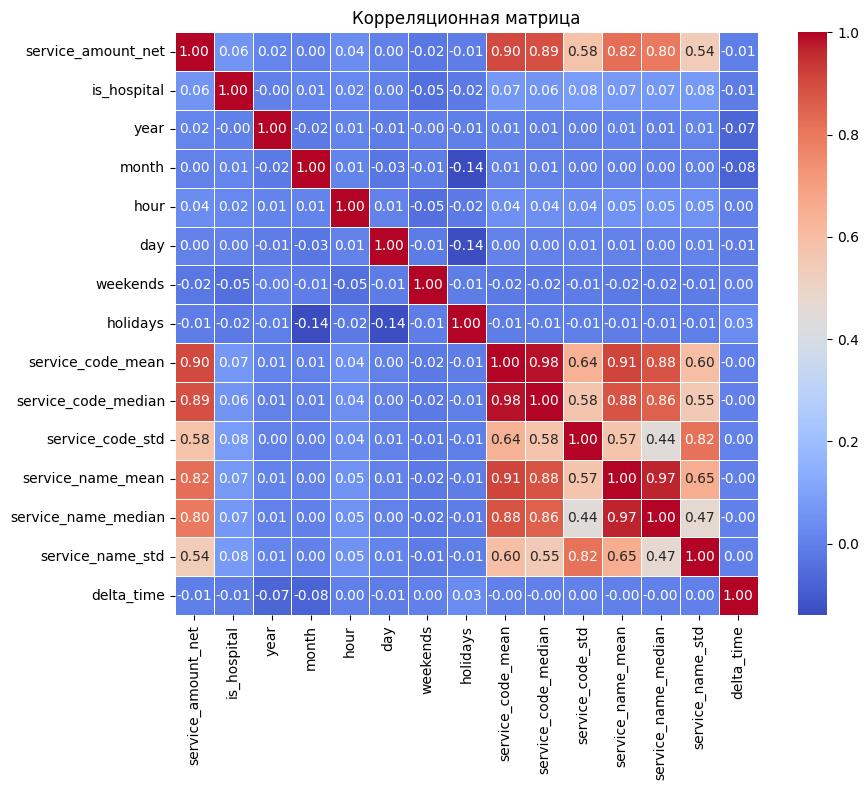

In [32]:
columns_to_exclude = ['service_document_id', 'account_document_id', 'service_date', 'date', 'time', 'patient_id', 'service_code', 'service_name', 'weekday_name',]
data_reduced = data.drop(columns=columns_to_exclude)

# Вычисляем корреляционную матрицу
correlation_matrix = data_reduced.corr()

# Визуализируем корреляционную матрицу с помощью seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Отображение значений корреляции на тепловой карте
    fmt=".2f",             # Формат отображения чисел (до двух знаков после запятой)
    cmap="coolwarm",       # Цветовая палитра
    cbar=True,             # Добавление цветовой шкалы
    square=True,           # Квадратные ячейки
    linewidths=0.5         # Ширина линий между ячейками
)
plt.title("Корреляционная матрица")  # Заголовок графика
plt.tight_layout()                   # Улучшение компоновки
plt.show()

In [36]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.0 MB/s eta 0:00:00


In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
data_linear = data.drop(columns=['service_document_id', 'account_document_id', 'time', 'date', 'service_code_median', 'service_name_std', 'service_name_mean', 'service_name_median', 'service_code_std'])
round_to_month = data_linear['service_date'].dt.to_period('M') #.dt.to_timestamp()
data_linear["service_date_month"] = round_to_month.dt.strftime('%Y-%m')
data_linear = data_linear.sort_values(by='service_date')
data_linear = data_linear.drop(columns=['service_date'])
oe = OrdinalEncoder()
data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']] = oe.fit_transform(data_linear[['patient_id', 'service_code', 'service_name', 'weekday_name']])
data_linear = data_linear.set_index('service_date_month')
data_linear['delta_seconds'] = data_linear['delta_time'].dt.total_seconds()
data_linear = data_linear.drop(columns=['delta_time'])
data_linear.head()
# X = data_linear.drop(columns='service_amount_net')
# y = data_linear['service_amount_net']


# X = X.set_index('date')
# X


,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,hour,day,weekday_name,weekends,holidays,service_code_mean,delta_seconds
service_date_month,,,,,,,,,,,,,,
2022-01,1925.0,24359.0,4214.0,1789.0,0,2022,1,12,1,4.0,1,1,2288.290331,0.0
2022-01,4800.0,1214.0,629.0,833.0,0,2022,1,12,1,4.0,1,1,5176.288072,0.0
2022-01,1453.5,8207.0,806.0,1000.0,0,2022,1,12,1,4.0,1,1,1656.989466,0.0
2022-01,331.5,8207.0,468.0,2083.0,0,2022,1,12,1,4.0,1,1,370.289979,0.0
2022-01,612.0,8207.0,1742.0,1752.0,0,2022,1,12,1,4.0,1,1,683.473515,0.0


In [ ]:
unique_months = data_linear.index.unique()
X_train = data_linear.loc[unique_months[:20]]
X_test = data_linear.loc[unique_months[-4:]]

y_train = X_train['service_amount_net']
y_test = X_test['service_amount_net']

X_train_ex=X_train[['patient_id', 'service_code', 'service_name', 'is_hospital', 'year', 'month', 'hour', 'day', 'weekday_name', 'weekends', 'holidays', 'service_code_mean', 'delta_seconds']]
X_test_ex=X_test[['patient_id', 'service_code', 'service_name', 'is_hospital', 'year', 'month', 'hour', 'day', 'weekday_name', 'weekends', 'holidays', 'service_code_mean', 'delta_seconds']]

sd = StandardScaler()
X_train_ex = sd.fit_transform(X_train_ex)
X_test_ex = sd.transform(X_test_ex)

mod = SARIMAX(y_train,
              exog=X_train_ex,
              order=(1,1,1),
              season_order=(1,1,1,12))

res = mod.fit()

start = len(X_train)
end = len(X_train) + len(X_test) - 1
prediction = res.predict(start, end, exog=X_test_ex)

prediction.index = X_test.index

ax = X_test['service_amount_net'].plot(legend=True)
prediction.plot(legend=True, ax=ax)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['season_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
prediction

In [ ]:
# fig = plt.figure(figsize = (20, 15))
# # sns.relplot(data=merged_pred,
# #             kind='line',
# #             x='service_date_month',
# #             y='service_amount_net',
# #             hue='year',
# #             style='year',
# #             aspect=4,
# #             legend=True)
# sns.lineplot(data=merged_pred,)

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
# Рассчитываем MSE и MAE
mse = mean_squared_error(X_test['service_amount_net'], prediction)
mae = mean_absolute_error(X_test['service_amount_net'], prediction)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 703971179.6840162
MAE: 23123.816840498668


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# sd = StandardScaler()
# X_train = sd.fit_transform(X_train)
# X_test = sd.transform(X_test)
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)
# y_test_pred = lin_reg.predict(X_test)
# mae = mean_absolute_error(y_test, y_test_pred)
# mae

512.1437917285846

In [ ]:
# !pip cache purge
# !pip uninstall numpy catboost -y
# !pip install numpy==1.26.4 catboost

Files removed: 12
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [ ]:
# from catboost import CatBoostRegressor
# X = data_linear.drop(columns='service_amount_net')
# y = data_linear['service_amount_net']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# cat_reg = CatBoostRegressor()
# cat_reg.fit(X_train, y_train, cat_features=['patient_id', 'service_code', 'service_name', 'weekday_name'])

Learning rate set to 0.119357
0:	learn: 5747.2307768	total: 994ms	remaining: 16m 32s
1:	learn: 5334.9242299	total: 1.81s	remaining: 15m 3s
2:	learn: 4992.0502814	total: 3.13s	remaining: 17m 20s
3:	learn: 4703.9860874	total: 4.66s	remaining: 19m 21s
4:	learn: 4464.1606120	total: 5.82s	remaining: 19m 19s
5:	learn: 4267.4471945	total: 6.66s	remaining: 18m 23s
6:	learn: 4106.9976488	total: 7.46s	remaining: 17m 38s
7:	learn: 3971.4263095	total: 8.19s	remaining: 16m 56s
8:	learn: 3858.6917330	total: 8.89s	remaining: 16m 19s
9:	learn: 3771.7017079	total: 9.69s	remaining: 15m 58s
10:	learn: 3701.5295652	total: 10.5s	remaining: 15m 42s
11:	learn: 3637.4932966	total: 11.3s	remaining: 15m 28s
12:	learn: 3592.2751335	total: 12s	remaining: 15m 7s
13:	learn: 3550.4529235	total: 12.6s	remaining: 14m 46s
14:	learn: 3518.7045130	total: 13.3s	remaining: 14m 36s
15:	learn: 3489.4138619	total: 14.1s	remaining: 14m 27s
16:	learn: 3468.3698661	total: 14.8s	remaining: 14m 15s
17:	learn: 3447.8164140	total: 1

array([  476.3778669 ,  3798.31034996, 23426.25451136, ...,
        2583.05076511,  3602.33873398,  1764.61131815])

In [ ]:
# y_test_pred_cat_reg = cat_reg.predict(X_test)
# mae = mean_absolute_error(y_test, y_test_pred_cat_reg)
# mae

499.4870955236351

In [ ]:
data['service_name'].value_counts()

,count
service_name,
0x95758EBA87326C4D5DECC8B51A8B9C61,235435
0x01D029DF0704C6B5891DF7C601181E4D,38576
0x5D533C5A2B92E32876D568371E6F4D11,33261
0xA7AB68E942204E8F7B65D9BE0FF048F9,19387
0x446CFFEA90575A46253EED6E407FCBBA,14471
...,...
0x4C1E642D70675751678234A962ACDB40,1
0x381DBC2CBE92CEC346F841B5E440CFC0,1
0xFED6AB76536A0092A33C3B7C22D0FF81,1


In [ ]:
data['service_code'].value_counts()

,count
service_code,
0xBD46A7B2FCD9FC493D8E2EDBE225C9D1,38576
0xC348428D50CD9C4624B157715093ACEE,32206
0xCDEA5658E0AD52E1700653CAE2A4928D,16780
0x332E8D3220A5317B23558A5E79CE00E4,14832
0x0C06FE9D8320596C34F48E35DFFC46AF,14318
...,...
0xAF569AD93D17687725EDD9143F8C8C7A,1
0x568FF715DB8FE40C0B9B3DA180C4C66C,1
0x59485D2364233C57AF57504FAA904325,1


In [ ]:
data.loc[data['service_name'] == '0x95758EBA87326C4D5DECC8B51A8B9C61', 'service_code'].value_counts()

,count
service_code,
0xCDEA5658E0AD52E1700653CAE2A4928D,16780
0x332E8D3220A5317B23558A5E79CE00E4,14832
0x54054703A9278593F2C779D0E128A3A6,11057
0x4F8A79924D1B8D817FC07D5B0814052F,9891
0xC9178011BA3F7F60E28BFE503478E35B,9400
...,...
0x7F14EA1DA585FE31B064B97627646157,1
0xB6F9224310282FFF00065E7989E58BAB,1
0x34550D9F86B74F6885E46B35819F3130,1


In [ ]:
data.loc[data['service_code'] == '0xCDEA5658E0AD52E1700653CAE2A4928D', 'service_name'].value_counts()

,count
service_name,
0x95758EBA87326C4D5DECC8B51A8B9C61,16780


Получается, service_name - категории, а service_code - подкатегории в этих категориях

In [ ]:
data['service_document_id'].value_counts()[data['service_document_id'].value_counts() > 1]#.loc[data['service_document_id'].value_counts()['count'] > 1]

,count
service_document_id,
0x15075263622836BE21F6ACB4FA8E4BF3,5
0x864FB272E89454CD72197128F400BAAC,3
0x633F8A146E95A4D3658B22B260C75196,3
0xBE186EFDA44422D591A558F8CBE28564,3
0xDA04A42EC25E7DF616078B7DA0E8FC5E,3
...,...
0x73E0EAEAC5E8E5283C798E394D1F29DB,2
0x78AB2DBC1B41C19920E934B5401E71B2,2
0xD6E1F1B7FC9447677271FAB94421F536,2


In [ ]:
data.loc[data['service_document_id'] == '0x15075263622836BE21F6ACB4FA8E4BF3']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time
298369,0x15075263622836BE21F6ACB4FA8E4BF3,0xE3AD0B25AAB74181C30E1895104D2C04,2022-07-31 18:07:00,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,7,2022-07-31,18:07:00
394920,0x15075263622836BE21F6ACB4FA8E4BF3,0x025EEF6559D288810B72E30DA01C72BC,2022-10-06 15:57:31,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:31
394921,0x15075263622836BE21F6ACB4FA8E4BF3,0xC957FFB34F7C95C41DA082B6ECB21592,2022-10-06 15:57:31,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:31
394922,0x15075263622836BE21F6ACB4FA8E4BF3,0x5220BB151561EBCC97CE43EAFC084896,2022-10-06 15:57:57,-2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:57
394923,0x15075263622836BE21F6ACB4FA8E4BF3,0x6B0CF840E51EF9A9B86E19CB514FB490,2022-10-06 15:57:57,2876,0xE51A49378A097CAC5BD7706574AD0403,0x01C391120DAD94DA39642E91A3B96CFD,0x9411B36A65F5B2170700E0DD35DF206C,0,2022,10,2022-10-06,15:57:57


In [ ]:
data.loc[data['service_amount_net'] == '2120,8']

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time


In [ ]:
data.loc[data['service_amount_net'] < 0]

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,year,month,date,time
8979,0xB407F4E7307937016418FB70C2D7861E,0xD77158B658DBB63C03BD9B3F4B28B1BE,2022-01-09 10:38:00,-322.50,0x54D712F99EF01D505AD63C1BDCD7F741,0x88279E546FF3469C6DE326908DDC010C,0x8B079834541542B443EDB050A3F6ABD6,0,2022,1,2022-01-09,10:38:00
8980,0xA049F908C65F532848BF82167464A96D,0x13A8A87093D4014DAACA1F03C3A8DEA4,2022-01-12 17:49:00,-322.50,0x54D712F99EF01D505AD63C1BDCD7F741,0x88279E546FF3469C6DE326908DDC010C,0x8B079834541542B443EDB050A3F6ABD6,0,2022,1,2022-01-12,17:49:00
9611,0x1EC5FC27360990822D30A30A55A325B2,0x51AE657DA227BA4FDBB3969C1302D1CA,2022-01-14 10:22:03,-2900.00,0x3105DF064BC58BAF05C8F92CE25CE057,0xE2179527DB3BF4A9A59C13B3F74E62FD,0x856F00A72FB646B8731AB8765F059F35,1,2022,1,2022-01-14,10:22:03
9612,0xE144DB6D04D8CDFA8AB7C0833462BCF2,0x940C76DA709BDAECF05408448593864D,2022-01-14 10:22:03,-15500.00,0x3105DF064BC58BAF05C8F92CE25CE057,0xF4D7FBBBF68CEB8F65C01EB76F2E6B13,0xDFAFEBF8AD1710D46E478BCA1CEC78B3,1,2022,1,2022-01-14,10:22:03
9613,0x2D009B5FD732B98B1CA49B5300AA360D,0xA0043F0209AE07086F2D43AA8DDB9905,2022-01-14 10:22:03,-500.00,0x3105DF064BC58BAF05C8F92CE25CE057,0x71143E6174CD8D0EE7B4221DAF83296C,0x1E90B234BD341DF3F99EF3E2331CB3AB,1,2022,1,2022-01-14,10:22:03
...,...,...,...,...,...,...,...,...,...,...,...,...
1024481,0x7BA3E55975398686EF73DD5DD7E009CC,0xD050C2091F0DEBE6DC2320D605488CC2,2023-11-21 14:13:11,-72.84,0x2F2203903C1ECA97E7D248EEE3DDE3B5,0x66CD7A731D670D9F5F319D6C37F180EC,0x495A685BBC1C169D2F6D2651B466DD71,1,2023,11,2023-11-21,14:13:11
1024483,0x3B6758E438A23950C61273F54A37BF69,0x93D517BBEE2397D71E4E22314AC2340E,2023-11-21 14:13:11,-30.45,0x2F2203903C1ECA97E7D248EEE3DDE3B5,0xFCC0E796C5625B9C7715C6B9849978B0,0xD874741C49B7FA8082864ABF4E02197E,1,2023,11,2023-11-21,14:13:11
1024485,0x511789CD7CA93AEE3FD39A7C52B60AE2,0x3D58DB61266F99107C290561E7F30475,2023-11-21 14:13:11,-15696.72,0x2F2203903C1ECA97E7D248EEE3DDE3B5,0x140374C5D9E80FFA4A61583114476AB8,0xFDF04541A2447EA2B8DF8FD1143D4174,1,2023,11,2023-11-21,14:13:11
1024487,0x01D95B001432CAD321110E5ACE1FAD03,0x0D9719302D472E7B68E1112A9F7DD152,2023-11-21 14:13:11,-10828.00,0x2F2203903C1ECA97E7D248EEE3DDE3B5,0x14376EB228783AAA18F9A9E5F2E25AEA,0xAF9B46BF5896AE49C9C769659B54C44C,1,2023,11,2023-11-21,14:13:11


In [ ]:
data['account_document_id'].value_counts()

,count
account_document_id,
0xF611B2F346D82DBC26676192407A6CE2,1
0xFDD38318ED6FC6EC68131DB6671F100C,1
0x9F7486A2D5FEFFF7453777B1D0592E16,1
0x83374A620812B848E878F705CAE63F82,1
0xE3BC57D8B3DB9EF897550648896D57CC,1
...,...
0x04848F8B05C6935CCECC26FB024BDC6E,1
0xC97D0DF950D35FA4AF2655D749259B36,1
0xE02E4412BB1F637FC4CDAFC793C4F7A4,1


In [ ]:
data['patient_id'].value_counts()

,count
patient_id,
0x037AB9CF4BAF80A173679FB9761A113D,4121
0xAECAFBEC992080A28B6351DC1E1551C2,2165
0x274B520D2D54E1604C6E69410A728CE0,1959
0xEA73B2A80C0D9647C3ABFA65195CFCBE,1951
0x53A2C720806E07E267EE2E32C7EEB8DF,1324
...,...
0xD1DFCC0E52753F953BEF98BC629E916B,1
0x1FAE39ACE7A65D71654A89B62643861F,1
0x028EDAC6500596FC82AF669C3CC0E973,1


In [ ]:
def add_rpss2022(date):
    return 1 if pd.Timestamp("2022-11-28") <= date <= pd.Timestamp("2023-01-31") else 0

def add_save25(date):
    return 1 if pd.Timestamp("2022-02-04") <= date <= pd.Timestamp("2022-02-20") else 0

def add_dedmraz(date):
    return 1 if pd.Timestamp("2022-01-01") <= date <= pd.Timestamp("2022-01-20") else 0

def add_greenday(date):
    return 1 if pd.Timestamp("2023-11-09") <= date <= pd.Timestamp("2023-11-12") else 0

def add_skidkanastrovku(date):
    return 1 if pd.Timestamp("2023-10-10") <= date <= pd.Timestamp("2023-11-08") else 0

def add_rpss2023(date):
    return 1 if pd.Timestamp("2023-06-13") <= date <= pd.Timestamp("2023-08-31") else 0

def add_sberagifinancy(date):
    return 1 if pd.Timestamp("2023-05-29") <= date <= pd.Timestamp("2023-07-09") else 0

In [ ]:
data["RPSS2022"] = data["service_date"].apply(add_rpss2022)
data["SAVE25"] = data["service_date"].apply(add_save25)
data["DEDMRAZ"] = data["service_date"].apply(add_dedmraz)
data["GREENDAY"] = data["service_date"].apply(add_greenday)
data["SKIDKANASTRAHOVKU"] = data["service_date"].apply(add_skidkanastrovku)
data["RPSS2023"] = data["service_date"].apply(add_rpss2023)
data["SBEREGIFINANCY"] = data["service_date"].apply(add_sberagifinancy)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
num_cols = ['service_amount_net', "RPSS2022", "SAVE25", "DEDMRAZ", "GREENDAY", "SKIDKANASTRAHOVKU", "RPSS2023", "SBEREGIFINANCY"]

<Axes: >

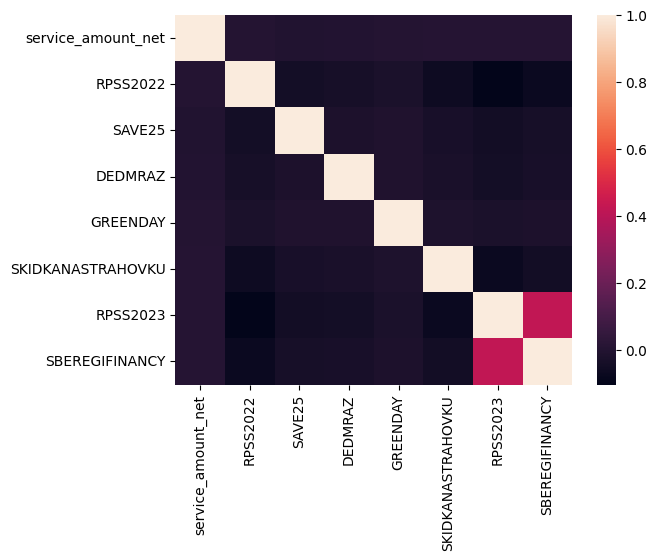

In [ ]:
corr = data[num_cols].corr()
sns.heatmap(corr)

In [ ]:
data.isna().sum()

,0
service_document_id,0
account_document_id,0
service_date,0
service_amount_net,0
patient_id,0
service_code,0
service_name,0
is_hospital,0
year,0
month,0


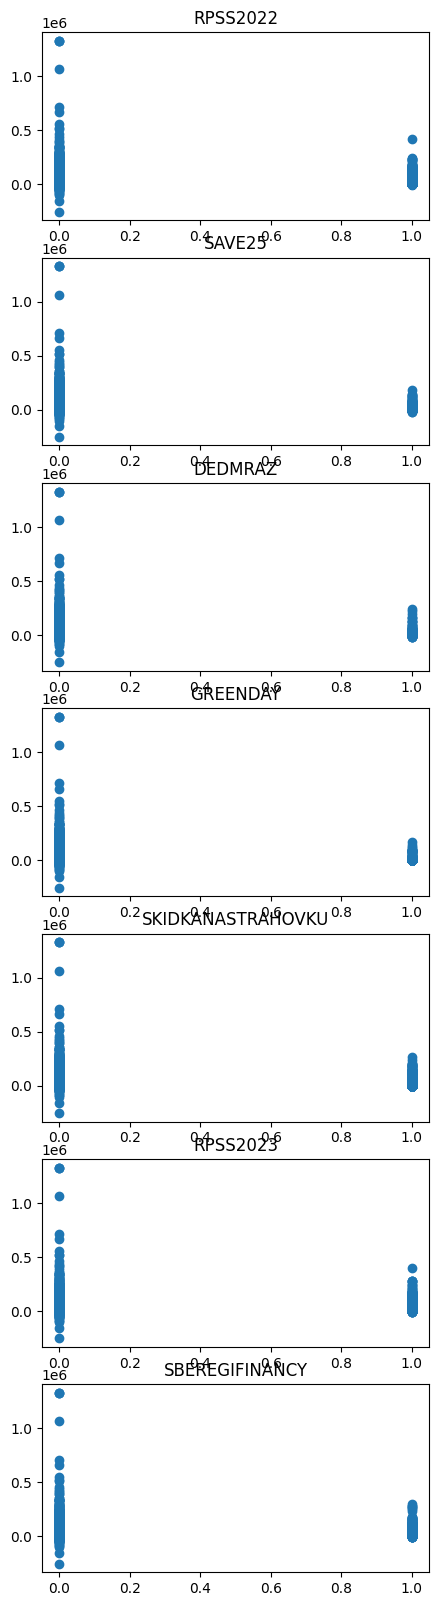

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(5, 20))
akcii = ["RPSS2022", "SAVE25", "DEDMRAZ", "GREENDAY", "SKIDKANASTRAHOVKU", "RPSS2023", "SBEREGIFINANCY"]
for i in range(1, 8):
    axes[i-1].scatter(data[akcii[i-1]], data['service_amount_net'])
    axes[i-1].set_title(akcii[i-1])
plt.show()

In [ ]:
import numpy as np

<Axes: xlabel='SAVE25', ylabel='service_amount_net'>

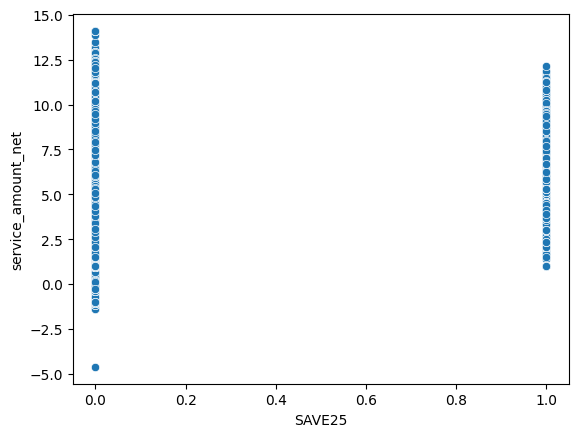

In [ ]:
sns.scatterplot(x=data[akcii[1]], y=data['service_amount_net'].apply(np.log))

In [ ]:
data['service_amount_net'].values.reshape( 1091043)

array([ 1925.  ,  4800.  ,  1710.  , ...,  9726.  ,  1764.  , 13212.37])

In [ ]:
data['SAVE25']

,SAVE25
0,0
1,0
2,0
3,0
4,0
...,...
1091038,0
1091039,0
1091040,0
1091041,0


In [ ]:
data.to_csv('/content/drive/MyDrive/data_akcii.csv')

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(data[['service_amount_net']])
for i in range(len(akcii)):
    y = data[akcii[i]]

    logit_model = sm.Logit(y, X)
    result = logit_model.fit()

    # Выводим результаты
    #print(result.summary())

    # Псевдо-R^2 (например, McFadden's R^2)
    pseudo_r2 = result.prsquared
    print(f'\n{akcii[i]}: \n')
    print(f"Pseudo R-squared: {pseudo_r2}")

    # Проверка статистической значимости модели
    # Likelihood Ratio Test (LR-test)
    llr_pvalue = result.llr_pvalue
    print(f"p-value for Likelihood Ratio Test: {llr_pvalue} \n")

Optimization terminated successfully.
         Current function value: 0.284132
         Iterations 6

RPSS2022: 

Pseudo R-squared: 9.495413614279968e-07
p-value for Likelihood Ratio Test: 0.442915528815946 

Optimization terminated successfully.
         Current function value: 0.100813
         Iterations 8

SAVE25: 

Pseudo R-squared: 0.00013740934818640138
p-value for Likelihood Ratio Test: 3.8337614495753936e-08 

Optimization terminated successfully.
         Current function value: 0.081109
         Iterations 8

DEDMRAZ: 

Pseudo R-squared: 8.271009884153191e-05
p-value for Likelihood Ratio Test: 0.00013013070340856268 

Optimization terminated successfully.
         Current function value: 0.032651
         Iterations 9

GREENDAY: 

Pseudo R-squared: 2.752545251694105e-05
p-value for Likelihood Ratio Test: 0.16138745529000997 

Optimization terminated successfully.
         Current function value: 0.174162
         Iterations 7

SKIDKANASTRAHOVKU: 

Pseudo R-squared: 5.810494

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['service_amount_net']], data['SAVE25'], test_size=0.000000001)

lor = LogisticRegression()
lor.fit(X_train, y_train)
lor.coef_

array([[-7.88312799e-06]])

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 4.00000e+00, 1.00000e+00, 0.00

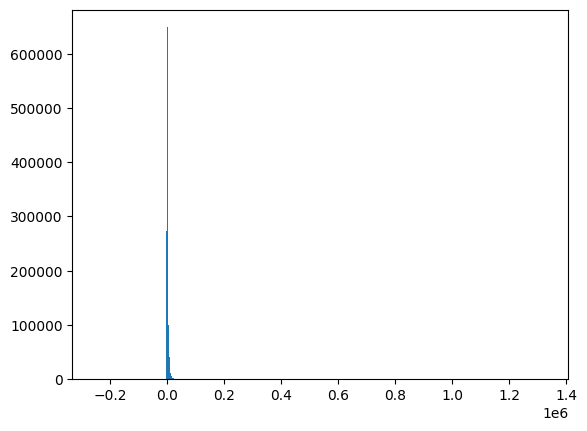

In [ ]:
plt.hist(data['service_amount_net'], bins=500)

In [ ]:
data['service_amount_net'].describe()

,service_amount_net
count,1.091043e+06
mean,2.335262e+03
std,6.482097e+03
min,-2.525600e+05
25%,4.200000e+02
50%,1.304000e+03
75%,2.480000e+03
max,1.328586e+06


In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

In [ ]:
data['season'] = data['month'].apply(get_season)

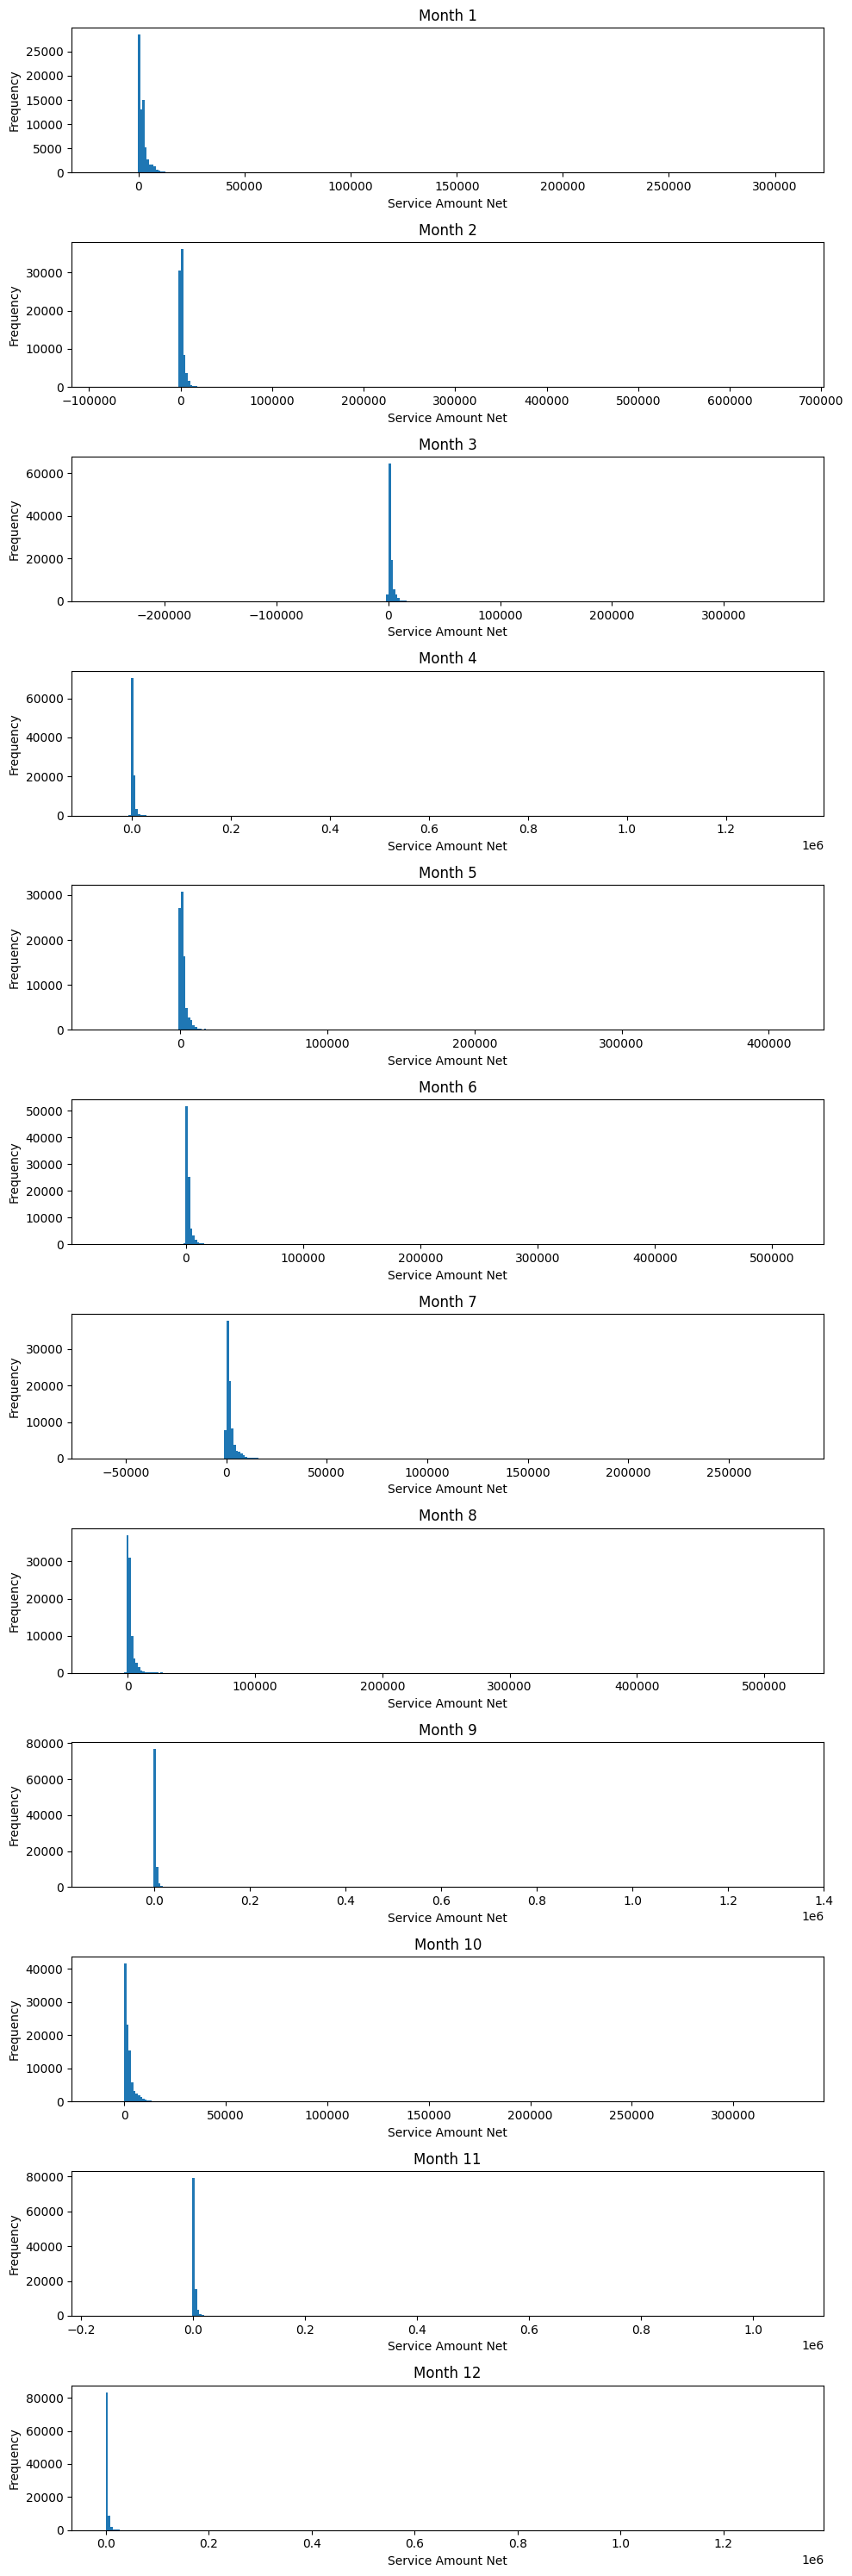

In [ ]:
fig, axes = plt.subplots(12, 1, figsize=(10, 30))
for i in range(1, 13):
    data_month = data.loc[(data['month'] == i) &
                         (data['service_amount_net'] > -10000000) &
                         (data['service_amount_net'] < 10000000)]
    axes[i-1].hist(data_month['service_amount_net'], bins=300)
    axes[i-1].set_title(f'Month {i}')
    axes[i-1].set_xlabel('Service Amount Net')
    axes[i-1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(7, 4, figsize=(10, 30))
seasons = ['winter', 'spring', 'summer', 'autumn']
for j in range(4):
    data_season = data.loc[data['season'] == seasons[j]]
    for i in range(7):
        data_month = data.loc[(data['month'] == i) &
                            (data['service_amount_net'] > -10000000) &
                            (data['service_amount_net'] < 10000000)]
        axes[i-1].hist(data_month['service_amount_net'], bins=300)
        axes[i-1].set_title(f'Month {i}')
        axes[i-1].set_xlabel('Service Amount Net')
        axes[i-1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

###Исследование целевой переменной на фулл данных

In [ ]:
data['service_amount_net'].describe()

,service_amount_net
count,1.091043e+06
mean,2.335262e+03
std,6.482097e+03
min,-2.525600e+05
25%,4.200000e+02
50%,1.304000e+03
75%,2.480000e+03
max,1.328586e+06


(array([183308., 238804.,  62312.,  53793.,  77623.,  75014.,  89118.,
         50180.,  37501.,  25249.,  24470.,  15304.,  14933.,  12338.,
          9727.,   7829.,   8220.,   7636.,  10237.,   6680.,   6891.,
          6270.,   5167.,   3598.,   6083.,   3960.,   3385.,   1832.,
          2729.,   2140.]),
 array([1.00000000e-02, 3.33289667e+02, 6.66569333e+02, 9.99849000e+02,
        1.33312867e+03, 1.66640833e+03, 1.99968800e+03, 2.33296767e+03,
        2.66624733e+03, 2.99952700e+03, 3.33280667e+03, 3.66608633e+03,
        3.99936600e+03, 4.33264567e+03, 4.66592533e+03, 4.99920500e+03,
        5.33248467e+03, 5.66576433e+03, 5.99904400e+03, 6.33232367e+03,
        6.66560333e+03, 6.99888300e+03, 7.33216267e+03, 7.66544233e+03,
        7.99872200e+03, 8.33200167e+03, 8.66528133e+03, 8.99856100e+03,
        9.33184067e+03, 9.66512033e+03, 9.99840000e+03]),
 <BarContainer object of 30 artists>)

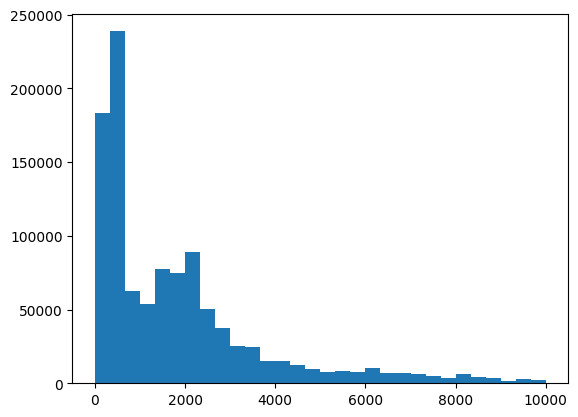

In [ ]:
plt.hist(data.loc[(data['service_amount_net'] > 0) & (data['service_amount_net'] < 10000), 'service_amount_net'], bins=30)

(array([1.000e+00, 1.000e+00, 6.000e+00, 2.000e+00, 8.000e+00, 3.000e+00,
        3.000e+00, 6.000e+00, 3.000e+00, 1.400e+01, 1.300e+01, 8.000e+00,
        2.000e+01, 3.900e+01, 1.900e+01, 3.700e+01, 4.400e+01, 4.700e+01,
        3.900e+01, 7.000e+01, 4.200e+01, 3.400e+01, 4.800e+01, 1.230e+02,
        1.650e+02, 1.460e+02, 1.650e+02, 1.290e+02, 5.250e+02, 5.597e+03]),
 array([-1.44780800e+04, -1.39955533e+04, -1.35130267e+04, -1.30305000e+04,
        -1.25479733e+04, -1.20654467e+04, -1.15829200e+04, -1.11003933e+04,
        -1.06178667e+04, -1.01353400e+04, -9.65281333e+03, -9.17028667e+03,
        -8.68776000e+03, -8.20523333e+03, -7.72270667e+03, -7.24018000e+03,
        -6.75765333e+03, -6.27512667e+03, -5.79260000e+03, -5.31007333e+03,
        -4.82754667e+03, -4.34502000e+03, -3.86249333e+03, -3.37996667e+03,
        -2.89744000e+03, -2.41491333e+03, -1.93238667e+03, -1.44986000e+03,
        -9.67333333e+02, -4.84806667e+02, -2.28000000e+00]),
 <BarContainer object of 30 artists

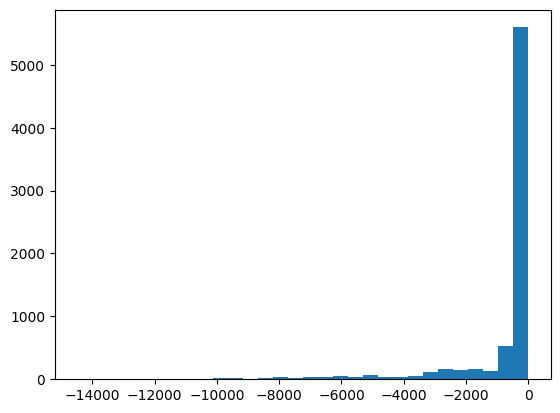

In [ ]:
plt.hist(data.loc[(data['service_amount_net'] < 0) & (data['service_amount_net'] > -15000), 'service_amount_net'], bins=30)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  3.,
         5.,  1.,  6., 33.]),
 array([-252560., -244658., -236756., -228854., -220952., -213050.,
        -205148., -197246., -189344., -181442., -173540., -165638.,
        -157736., -149834., -141932., -134030., -126128., -118226.,
        -110324., -102422.,  -94520.,  -86618.,  -78716.,  -70814.,
         -62912.,  -55010.,  -47108.,  -39206.,  -31304.,  -23402.,
         -15500.]),
 <BarContainer object of 30 artists>)

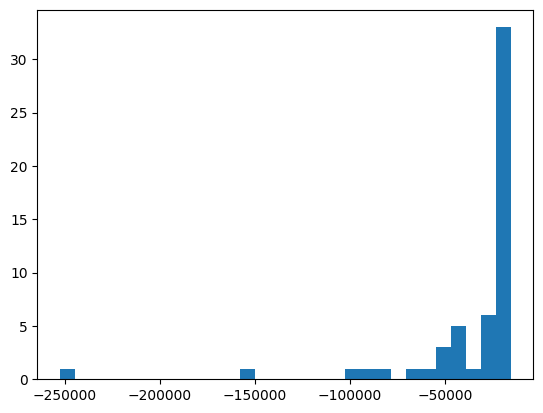

In [ ]:
plt.hist(data.loc[(data['service_amount_net'] < -15000), 'service_amount_net'], bins=30)

(array([5817., 3429., 2832., 1918., 1446., 1650., 1146.,  790.,  638.,
         559.,  614.,  554.,  516.,  267.,  231.,  194.,  204.,  203.,
         281.,   97.,  203.,   98.,  105.,   75.,  185.,  117.,   83.,
          81.,   69.,   43.]),
 array([10002.57      , 11333.89766667, 12665.22533333, 13996.553     ,
        15327.88066667, 16659.20833333, 17990.536     , 19321.86366667,
        20653.19133333, 21984.519     , 23315.84666667, 24647.17433333,
        25978.502     , 27309.82966667, 28641.15733333, 29972.485     ,
        31303.81266667, 32635.14033333, 33966.468     , 35297.79566667,
        36629.12333333, 37960.451     , 39291.77866667, 40623.10633333,
        41954.434     , 43285.76166667, 44617.08933333, 45948.417     ,
        47279.74466667, 48611.07233333, 49942.4       ]),
 <BarContainer object of 30 artists>)

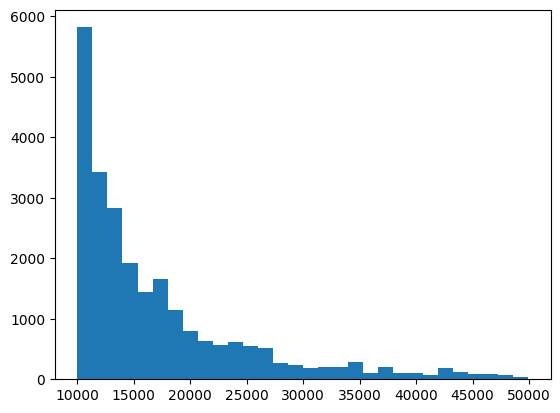

In [ ]:
plt.hist(data.loc[(data['service_amount_net'] > 10000) & (data['service_amount_net'] < 50000), 'service_amount_net'], bins=30)

(array([211., 126.,  26.,  91.,  56.,  59.,  63.,  41.,  65.,  75.,  53.,
         41.,  64.,  42.,  56.,  61.,  29.,  52.,  57.,  50.,  36.,  28.,
         44.,  19.,  34.,  17.,  19.,  32.,  28.,  27.]),
 array([50007.2       , 51668.18666667, 53329.17333333, 54990.16      ,
        56651.14666667, 58312.13333333, 59973.12      , 61634.10666667,
        63295.09333333, 64956.08      , 66617.06666667, 68278.05333333,
        69939.04      , 71600.02666667, 73261.01333333, 74922.        ,
        76582.98666667, 78243.97333333, 79904.96      , 81565.94666667,
        83226.93333333, 84887.92      , 86548.90666667, 88209.89333333,
        89870.88      , 91531.86666667, 93192.85333333, 94853.84      ,
        96514.82666667, 98175.81333333, 99836.8       ]),
 <BarContainer object of 30 artists>)

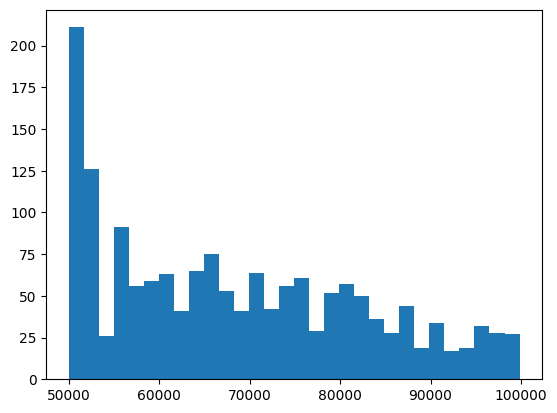

In [ ]:
plt.hist(data.loc[(data['service_amount_net'] > 50000) & (data['service_amount_net'] < 100000), 'service_amount_net'], bins=30)

(array([75., 64., 71., 52., 36., 39., 67., 30., 42., 33., 32., 25., 12.,
        23., 19., 12., 11.,  9.,  7.,  4.,  9., 12.,  2.,  6.,  2.,  1.,
         3.,  5.,  2.,  2.]),
 array([100190.        , 106800.33866667, 113410.67733333, 120021.016     ,
        126631.35466667, 133241.69333333, 139852.032     , 146462.37066667,
        153072.70933333, 159683.048     , 166293.38666667, 172903.72533333,
        179514.064     , 186124.40266667, 192734.74133333, 199345.08      ,
        205955.41866667, 212565.75733333, 219176.096     , 225786.43466667,
        232396.77333333, 239007.112     , 245617.45066667, 252227.78933333,
        258838.128     , 265448.46666667, 272058.80533333, 278669.144     ,
        285279.48266667, 291889.82133333, 298500.16      ]),
 <BarContainer object of 30 artists>)

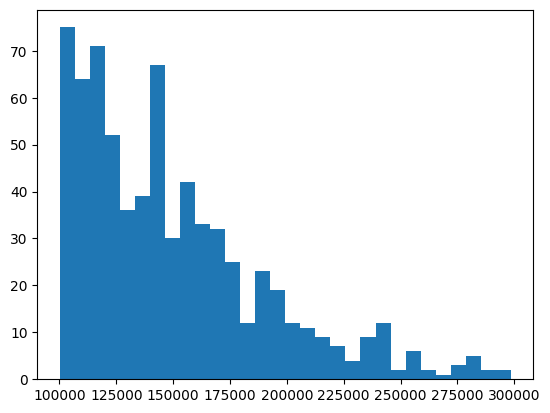

In [ ]:
plt.hist(data.loc[(data['service_amount_net'] > 100000) & (data['service_amount_net'] < 300000), 'service_amount_net'], bins=30)

(array([6., 7., 2., 3., 1., 0., 2., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 3.]),
 array([ 302419.47 ,  336625.021,  370830.572,  405036.123,  439241.674,
         473447.225,  507652.776,  541858.327,  576063.878,  610269.429,
         644474.98 ,  678680.531,  712886.082,  747091.633,  781297.184,
         815502.735,  849708.286,  883913.837,  918119.388,  952324.939,
         986530.49 , 1020736.041, 1054941.592, 1089147.143, 1123352.694,
        1157558.245, 1191763.796, 1225969.347, 1260174.898, 1294380.449,
        1328586.   ]),
 <BarContainer object of 30 artists>)

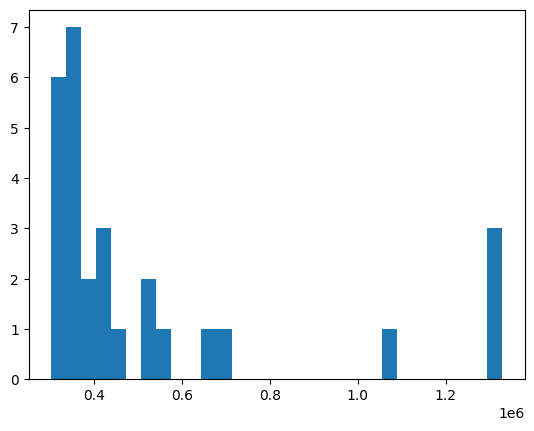

In [ ]:
plt.hist(data.loc[(data['service_amount_net'] > 300000), 'service_amount_net'], bins=30)

###Исследование целевой переменной на зимних данных

In [ ]:
data_winter = data.loc[(data['month'] == 1) | (data['month'] == 2) | (data['month'] == 12)]
data_winter['service_amount_net'].describe()

,service_amount_net
count,2.497960e+05
mean,2.373283e+03
std,6.880848e+03
min,-8.156800e+04
25%,4.250000e+02
50%,1.325600e+03
75%,2.500700e+03
max,1.328586e+06


In [ ]:
axes, fig = plt.subplots(7, 1, figsize=(10, 30))
for i in range(7):
    data_season = data.loc[data['']]

(array([41282., 56038., 14425., 11968., 17388., 17408., 20606., 11395.,
         8573.,  5804.,  5649.,  3585.,  3344.,  2811.,  2290.,  1867.,
         1968.,  1793.,  2576.,  1649.,  1591.,  1433.,  1295.,   908.,
         1487.,   976.,   756.,   455.,   612.,   552.]),
 array([1.00000000e-02, 3.33054667e+02, 6.66099333e+02, 9.99144000e+02,
        1.33218867e+03, 1.66523333e+03, 1.99827800e+03, 2.33132267e+03,
        2.66436733e+03, 2.99741200e+03, 3.33045667e+03, 3.66350133e+03,
        3.99654600e+03, 4.32959067e+03, 4.66263533e+03, 4.99568000e+03,
        5.32872467e+03, 5.66176933e+03, 5.99481400e+03, 6.32785867e+03,
        6.66090333e+03, 6.99394800e+03, 7.32699267e+03, 7.66003733e+03,
        7.99308200e+03, 8.32612667e+03, 8.65917133e+03, 8.99221600e+03,
        9.32526067e+03, 9.65830533e+03, 9.99135000e+03]),
 <BarContainer object of 30 artists>)

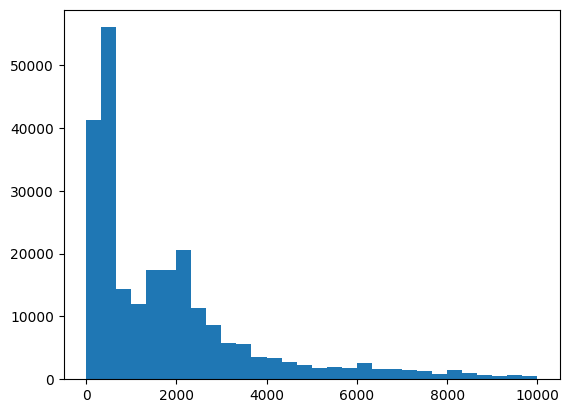

In [ ]:
plt.hist(data_winter.loc[(data_winter['service_amount_net'] > 0) & (data_winter['service_amount_net'] < 10000), 'service_amount_net'], bins=30)

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,
          1.,   2.,   5.,   8.,   0.,  11.,   7.,   6.,   7.,   5.,  11.,
         19.,  21.,  33.,   2.,   9.,   5.,  67., 129.]),
 array([-1.3200000e+04, -1.2760135e+04, -1.2320270e+04, -1.1880405e+04,
        -1.1440540e+04, -1.1000675e+04, -1.0560810e+04, -1.0120945e+04,
        -9.6810800e+03, -9.2412150e+03, -8.8013500e+03, -8.3614850e+03,
        -7.9216200e+03, -7.4817550e+03, -7.0418900e+03, -6.6020250e+03,
        -6.1621600e+03, -5.7222950e+03, -5.2824300e+03, -4.8425650e+03,
        -4.4027000e+03, -3.9628350e+03, -3.5229700e+03, -3.0831050e+03,
        -2.6432400e+03, -2.2033750e+03, -1.7635100e+03, -1.3236450e+03,
        -8.8378000e+02, -4.4391500e+02, -4.0500000e+00]),
 <BarContainer object of 30 artists>)

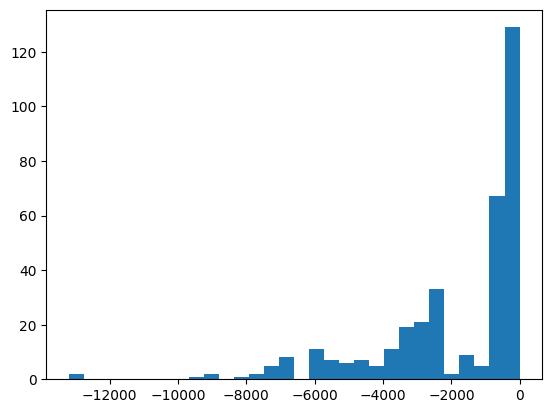

In [ ]:
plt.hist(data_winter.loc[(data_winter['service_amount_net'] < 0) & (data_winter['service_amount_net'] > -15000), 'service_amount_net'], bins=30)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 4.]),
 array([-81568.        , -79365.73333333, -77163.46666667, -74961.2       ,
        -72758.93333333, -70556.66666667, -68354.4       , -66152.13333333,
        -63949.86666667, -61747.6       , -59545.33333333, -57343.06666667,
        -55140.8       , -52938.53333333, -50736.26666667, -48534.        ,
        -46331.73333333, -44129.46666667, -41927.2       , -39724.93333333,
        -37522.66666667, -35320.4       , -33118.13333333, -30915.86666667,
        -28713.6       , -26511.33333333, -24309.06666667, -22106.8       ,
        -19904.53333333, -17702.26666667, -15500.        ]),
 <BarContainer object of 30 artists>)

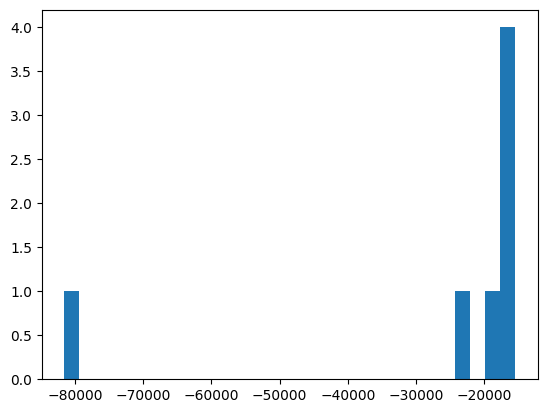

In [ ]:
plt.hist(data_winter.loc[(data_winter['service_amount_net'] < -15000), 'service_amount_net'], bins=30)

(array([1345.,  805.,  634.,  425.,  293.,  339.,  230.,  139.,  125.,
         114.,  154.,  131.,  109.,   55.,   44.,   43.,   47.,   49.,
          65.,   11.,   63.,   11.,   26.,   14.,   52.,   25.,   16.,
          21.,   23.,   12.]),
 array([10004.        , 11333.73333333, 12663.46666667, 13993.2       ,
        15322.93333333, 16652.66666667, 17982.4       , 19312.13333333,
        20641.86666667, 21971.6       , 23301.33333333, 24631.06666667,
        25960.8       , 27290.53333333, 28620.26666667, 29950.        ,
        31279.73333333, 32609.46666667, 33939.2       , 35268.93333333,
        36598.66666667, 37928.4       , 39258.13333333, 40587.86666667,
        41917.6       , 43247.33333333, 44577.06666667, 45906.8       ,
        47236.53333333, 48566.26666667, 49896.        ]),
 <BarContainer object of 30 artists>)

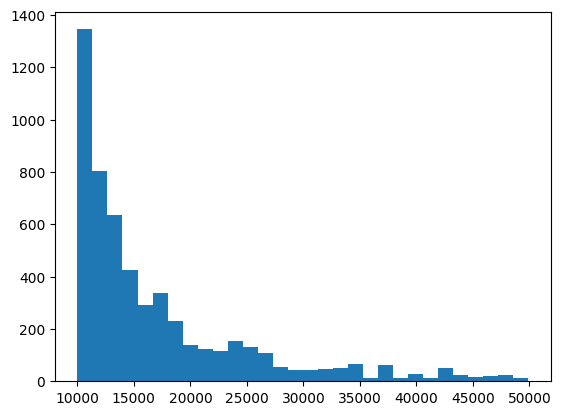

In [ ]:
plt.hist(data_winter.loc[(data_winter['service_amount_net'] > 10000) & (data_winter['service_amount_net'] < 50000), 'service_amount_net'], bins=30)

(array([54., 20.,  5., 22., 15., 13., 13.,  5., 17., 17.,  9.,  9., 15.,
        12., 16., 16.,  2., 15., 10., 11.,  6.,  7., 12.,  2.,  8.,  7.,
         2.,  4.,  6.,  5.]),
 array([50007.2       , 51668.18666667, 53329.17333333, 54990.16      ,
        56651.14666667, 58312.13333333, 59973.12      , 61634.10666667,
        63295.09333333, 64956.08      , 66617.06666667, 68278.05333333,
        69939.04      , 71600.02666667, 73261.01333333, 74922.        ,
        76582.98666667, 78243.97333333, 79904.96      , 81565.94666667,
        83226.93333333, 84887.92      , 86548.90666667, 88209.89333333,
        89870.88      , 91531.86666667, 93192.85333333, 94853.84      ,
        96514.82666667, 98175.81333333, 99836.8       ]),
 <BarContainer object of 30 artists>)

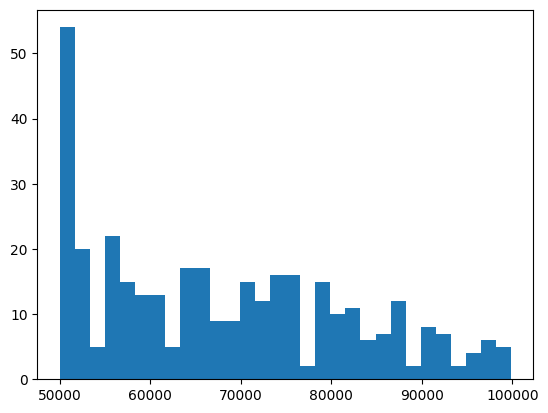

In [ ]:
plt.hist(data_winter.loc[(data_winter['service_amount_net'] > 50000) & (data_winter['service_amount_net'] < 100000), 'service_amount_net'], bins=30)

(array([14., 11.,  6., 17.,  7.,  8., 12.,  9., 17.,  5., 14., 12.,  6.,
         8.,  2.,  3.,  4.,  7.,  4.,  0.,  0.,  4.,  1.,  3.,  3.,  3.,
         1.,  3.,  1.,  2.]),
 array([100260.        , 105415.93333333, 110571.86666667, 115727.8       ,
        120883.73333333, 126039.66666667, 131195.6       , 136351.53333333,
        141507.46666667, 146663.4       , 151819.33333333, 156975.26666667,
        162131.2       , 167287.13333333, 172443.06666667, 177599.        ,
        182754.93333333, 187910.86666667, 193066.8       , 198222.73333333,
        203378.66666667, 208534.6       , 213690.53333333, 218846.46666667,
        224002.4       , 229158.33333333, 234314.26666667, 239470.2       ,
        244626.13333333, 249782.06666667, 254938.        ]),
 <BarContainer object of 30 artists>)

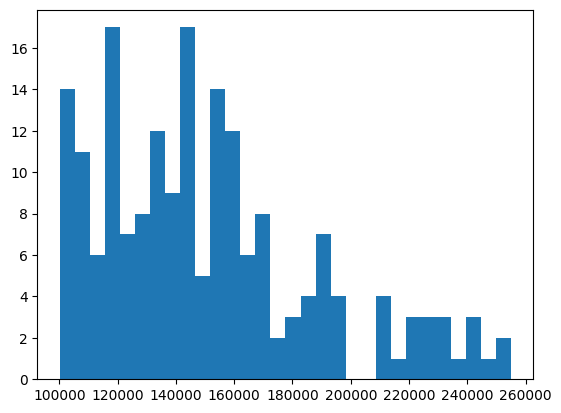

In [ ]:
plt.hist(data_winter.loc[(data_winter['service_amount_net'] > 100000) & (data_winter['service_amount_net'] < 300000), 'service_amount_net'], bins=30)

(array([1., 1., 0., 2., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 306900. ,  340956.2,  375012.4,  409068.6,  443124.8,  477181. ,
         511237.2,  545293.4,  579349.6,  613405.8,  647462. ,  681518.2,
         715574.4,  749630.6,  783686.8,  817743. ,  851799.2,  885855.4,
         919911.6,  953967.8,  988024. , 1022080.2, 1056136.4, 1090192.6,
        1124248.8, 1158305. , 1192361.2, 1226417.4, 1260473.6, 1294529.8,
        1328586. ]),
 <BarContainer object of 30 artists>)

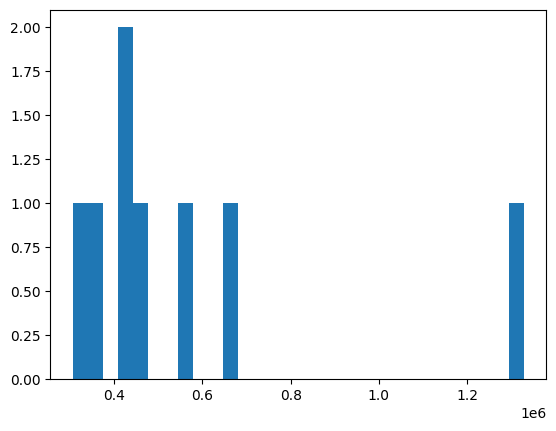

In [ ]:
plt.hist(data_winter.loc[(data_winter['service_amount_net'] > 300000), 'service_amount_net'], bins=30)

###Исследование целевой переменной на весенних данных

In [ ]:
data_spring = data.loc[(data['month'] == 3) | (data['month'] == 4) | (data['month'] == 5)]
data_spring['service_amount_net'].describe()

,service_amount_net
count,2.842950e+05
mean,2.321849e+03
std,6.363799e+03
min,-2.525600e+05
25%,4.170000e+02
50%,1.275200e+03
75%,2.500700e+03
max,1.328586e+06


(array([48681., 62850., 15938., 13402., 19864., 18816., 22732., 13390.,
         9843.,  6825.,  6667.,  4149.,  4099.,  3104.,  2492.,  2067.,
         2148.,  1892.,  2656.,  1686.,  1762.,  1597.,  1310.,   918.,
         1442.,  1050.,   891.,   480.,   680.,   585.]),
 array([3.50000000e-01, 3.33618333e+02, 6.66886667e+02, 1.00015500e+03,
        1.33342333e+03, 1.66669167e+03, 1.99996000e+03, 2.33322833e+03,
        2.66649667e+03, 2.99976500e+03, 3.33303333e+03, 3.66630167e+03,
        3.99957000e+03, 4.33283833e+03, 4.66610667e+03, 4.99937500e+03,
        5.33264333e+03, 5.66591167e+03, 5.99918000e+03, 6.33244833e+03,
        6.66571667e+03, 6.99898500e+03, 7.33225333e+03, 7.66552167e+03,
        7.99879000e+03, 8.33205833e+03, 8.66532667e+03, 8.99859500e+03,
        9.33186333e+03, 9.66513167e+03, 9.99840000e+03]),
 <BarContainer object of 30 artists>)

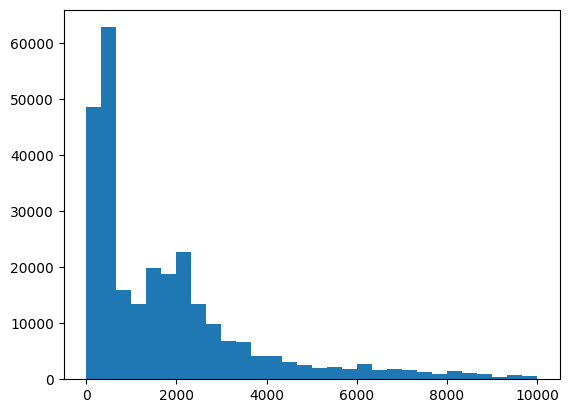

In [ ]:
plt.hist(data_spring.loc[(data_spring['service_amount_net'] > 0) & (data_spring['service_amount_net'] < 10000), 'service_amount_net'], bins=30)

(array([1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 6.000e+00, 1.000e+00, 1.000e+01, 2.900e+01, 1.000e+00,
        9.000e+00, 1.100e+01, 2.200e+01, 1.300e+01, 1.000e+01, 1.600e+01,
        1.700e+01, 1.400e+01, 8.000e+00, 1.300e+01, 2.800e+01, 5.400e+01,
        3.900e+01, 4.600e+01, 3.100e+01, 4.900e+01, 1.440e+02, 1.073e+03]),
 array([-1.26670800e+04, -1.22449413e+04, -1.18228027e+04, -1.14006640e+04,
        -1.09785253e+04, -1.05563867e+04, -1.01342480e+04, -9.71210933e+03,
        -9.28997067e+03, -8.86783200e+03, -8.44569333e+03, -8.02355467e+03,
        -7.60141600e+03, -7.17927733e+03, -6.75713867e+03, -6.33500000e+03,
        -5.91286133e+03, -5.49072267e+03, -5.06858400e+03, -4.64644533e+03,
        -4.22430667e+03, -3.80216800e+03, -3.38002933e+03, -2.95789067e+03,
        -2.53575200e+03, -2.11361333e+03, -1.69147467e+03, -1.26933600e+03,
        -8.47197333e+02, -4.25058667e+02, -2.92000000e+00]),
 <BarContainer object of 30 artists

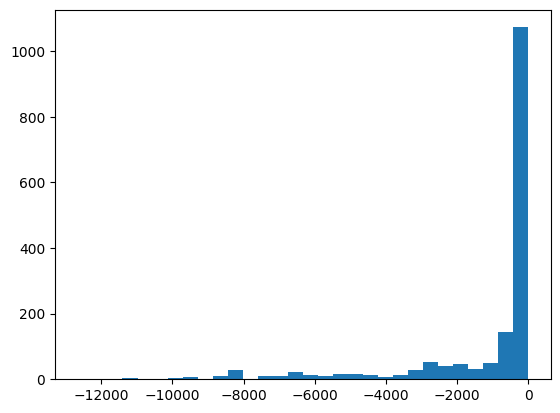

In [ ]:
plt.hist(data_spring.loc[(data_spring['service_amount_net'] < 0) & (data_spring['service_amount_net'] > -15000), 'service_amount_net'], bins=30)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
         1.,  1.,  3., 11.]),
 array([-252560., -244675., -236790., -228905., -221020., -213135.,
        -205250., -197365., -189480., -181595., -173710., -165825.,
        -157940., -150055., -142170., -134285., -126400., -118515.,
        -110630., -102745.,  -94860.,  -86975.,  -79090.,  -71205.,
         -63320.,  -55435.,  -47550.,  -39665.,  -31780.,  -23895.,
         -16010.]),
 <BarContainer object of 30 artists>)

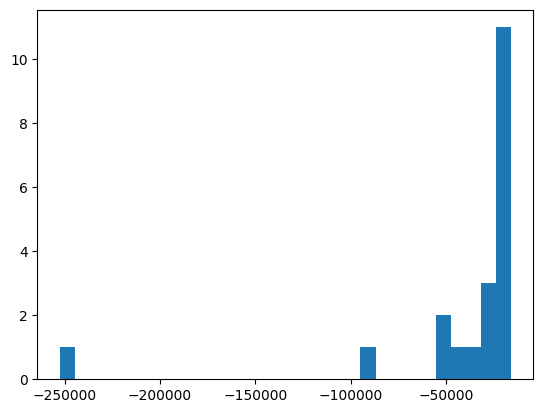

In [ ]:
plt.hist(data_spring.loc[(data_spring['service_amount_net'] < -15000), 'service_amount_net'], bins=30)

(array([1557.,  953.,  759.,  518.,  417.,  447.,  375.,  206.,  185.,
         131.,  149.,  149.,  115.,   66.,   66.,   44.,   50.,   53.,
          55.,   35.,   54.,   24.,   23.,   17.,   15.,   61.,   22.,
          26.,   13.,   14.]),
 array([10004.        , 11321.73333333, 12639.46666667, 13957.2       ,
        15274.93333333, 16592.66666667, 17910.4       , 19228.13333333,
        20545.86666667, 21863.6       , 23181.33333333, 24499.06666667,
        25816.8       , 27134.53333333, 28452.26666667, 29770.        ,
        31087.73333333, 32405.46666667, 33723.2       , 35040.93333333,
        36358.66666667, 37676.4       , 38994.13333333, 40311.86666667,
        41629.6       , 42947.33333333, 44265.06666667, 45582.8       ,
        46900.53333333, 48218.26666667, 49536.        ]),
 <BarContainer object of 30 artists>)

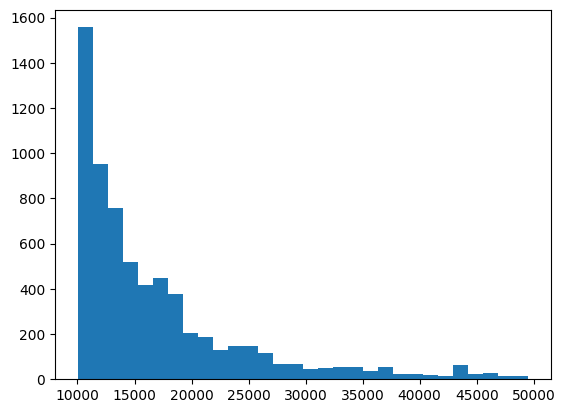

In [ ]:
plt.hist(data_spring.loc[(data_spring['service_amount_net'] > 10000) & (data_spring['service_amount_net'] < 50000), 'service_amount_net'], bins=30)

(array([55., 30., 10., 26., 19., 13., 16., 11., 18., 14., 21., 11.,  8.,
        10., 10., 19., 11., 17., 11., 21., 13.,  5., 16.,  3.,  9.,  3.,
         7.,  9.,  6., 12.]),
 array([50007.2 , 51667.58, 53327.96, 54988.34, 56648.72, 58309.1 ,
        59969.48, 61629.86, 63290.24, 64950.62, 66611.  , 68271.38,
        69931.76, 71592.14, 73252.52, 74912.9 , 76573.28, 78233.66,
        79894.04, 81554.42, 83214.8 , 84875.18, 86535.56, 88195.94,
        89856.32, 91516.7 , 93177.08, 94837.46, 96497.84, 98158.22,
        99818.6 ]),
 <BarContainer object of 30 artists>)

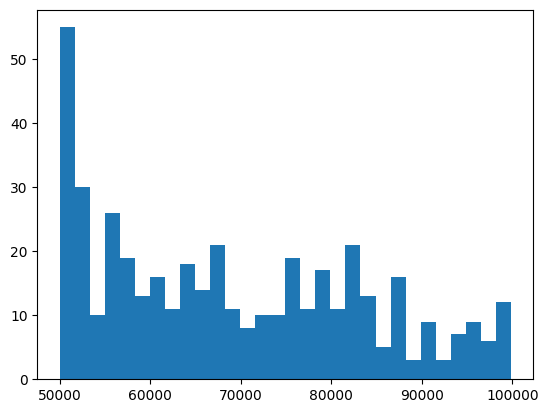

In [ ]:
plt.hist(data_spring.loc[(data_spring['service_amount_net'] > 50000) & (data_spring['service_amount_net'] < 100000), 'service_amount_net'], bins=30)

(array([19., 17.,  5., 14., 10.,  4., 10.,  9., 11.,  4.,  4.,  7.,  2.,
         5.,  5.,  3.,  4.,  1.,  1.,  4.,  0.,  2.,  2.,  2.,  0.,  0.,
         2.,  0.,  0.,  1.]),
 array([101836.   , 108391.472, 114946.944, 121502.416, 128057.888,
        134613.36 , 141168.832, 147724.304, 154279.776, 160835.248,
        167390.72 , 173946.192, 180501.664, 187057.136, 193612.608,
        200168.08 , 206723.552, 213279.024, 219834.496, 226389.968,
        232945.44 , 239500.912, 246056.384, 252611.856, 259167.328,
        265722.8  , 272278.272, 278833.744, 285389.216, 291944.688,
        298500.16 ]),
 <BarContainer object of 30 artists>)

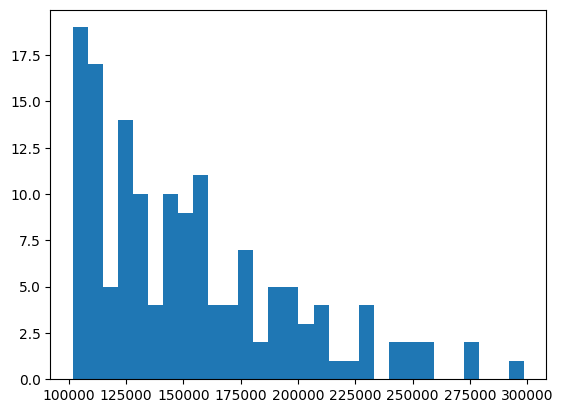

In [ ]:
plt.hist(data_spring.loc[(data_spring['service_amount_net'] > 100000) & (data_spring['service_amount_net'] < 300000), 'service_amount_net'], bins=30)

(array([3., 4., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 302419.47 ,  336625.021,  370830.572,  405036.123,  439241.674,
         473447.225,  507652.776,  541858.327,  576063.878,  610269.429,
         644474.98 ,  678680.531,  712886.082,  747091.633,  781297.184,
         815502.735,  849708.286,  883913.837,  918119.388,  952324.939,
         986530.49 , 1020736.041, 1054941.592, 1089147.143, 1123352.694,
        1157558.245, 1191763.796, 1225969.347, 1260174.898, 1294380.449,
        1328586.   ]),
 <BarContainer object of 30 artists>)

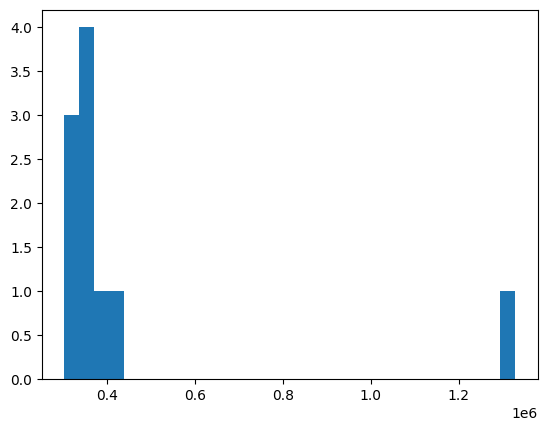

In [ ]:
plt.hist(data_spring.loc[(data_spring['service_amount_net'] > 300000), 'service_amount_net'], bins=30)

###Исследование целевой переменной на летних данных

(array([44613., 57469., 15362., 13344., 19055., 17641., 21946., 12234.,
         9076.,  5966.,  5531.,  3705.,  3442.,  3140.,  2312.,  1795.,
         1918.,  1821.,  2352.,  1357.,  1792.,  1589.,  1239.,   862.,
         1505.,   947.,   788.,   502.,   641.,   556.]),
 array([2.50000000e-01, 3.33041667e+02, 6.65833333e+02, 9.98625000e+02,
        1.33141667e+03, 1.66420833e+03, 1.99700000e+03, 2.32979167e+03,
        2.66258333e+03, 2.99537500e+03, 3.32816667e+03, 3.66095833e+03,
        3.99375000e+03, 4.32654167e+03, 4.65933333e+03, 4.99212500e+03,
        5.32491667e+03, 5.65770833e+03, 5.99050000e+03, 6.32329167e+03,
        6.65608333e+03, 6.98887500e+03, 7.32166667e+03, 7.65445833e+03,
        7.98725000e+03, 8.32004167e+03, 8.65283333e+03, 8.98562500e+03,
        9.31841667e+03, 9.65120833e+03, 9.98400000e+03]),
 <BarContainer object of 30 artists>)

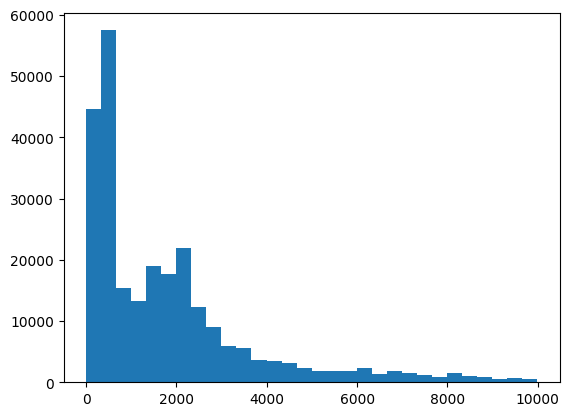

In [ ]:
data_summer = data.loc[(data['month'] == 6) | (data['month'] == 7) | (data['month'] == 8)]

plt.hist(data_summer.loc[(data_summer['service_amount_net'] > 0) & (data_summer['service_amount_net'] < 10000), 'service_amount_net'], bins=30)

###Исследование целевой переменной на осенних данных

(array([48976., 62203., 16511., 15131., 21340., 20458., 24521., 13135.,
         9940.,  6727.,  6169.,  4283.,  3957.,  3418.,  2643.,  2059.,
         2220.,  2032.,  2704.,  1850.,  1880.,  1553.,  1435.,   913.,
         1681.,   980.,   772.,   578.,   688.,   574.]),
 array([3.20000000e-01, 3.33009333e+02, 6.65698667e+02, 9.98388000e+02,
        1.33107733e+03, 1.66376667e+03, 1.99645600e+03, 2.32914533e+03,
        2.66183467e+03, 2.99452400e+03, 3.32721333e+03, 3.65990267e+03,
        3.99259200e+03, 4.32528133e+03, 4.65797067e+03, 4.99066000e+03,
        5.32334933e+03, 5.65603867e+03, 5.98872800e+03, 6.32141733e+03,
        6.65410667e+03, 6.98679600e+03, 7.31948533e+03, 7.65217467e+03,
        7.98486400e+03, 8.31755333e+03, 8.65024267e+03, 8.98293200e+03,
        9.31562133e+03, 9.64831067e+03, 9.98100000e+03]),
 <BarContainer object of 30 artists>)

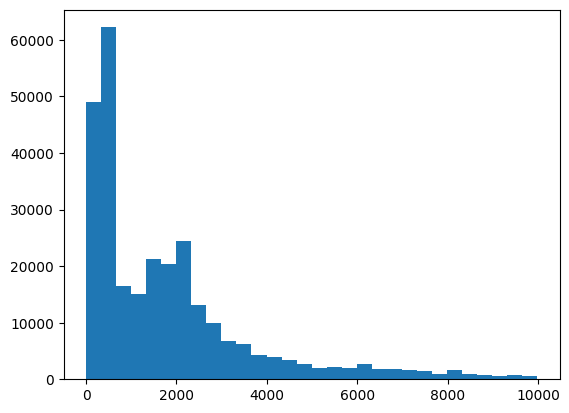

In [ ]:
data_fall = data.loc[(data['month'] == 9) | (data['month'] == 10) | (data['month'] == 11)]

plt.hist(data_fall.loc[(data_fall['service_amount_net'] > 0) & (data_fall['service_amount_net'] < 10000), 'service_amount_net'], bins=30)